# Explore Dataset Directory Structure

In [52]:
import numpy as np
import pandas as pd 

import os
for dirname, subdirs, _ in os.walk('/kaggle/input/intel-image-classification'):
    print(dirname)

/kaggle/input/intel-image-classification
/kaggle/input/intel-image-classification/seg_train
/kaggle/input/intel-image-classification/seg_train/seg_train
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain
/kaggle/input/intel-image-classification/seg_train/seg_train/street
/kaggle/input/intel-image-classification/seg_train/seg_train/buildings
/kaggle/input/intel-image-classification/seg_train/seg_train/sea
/kaggle/input/intel-image-classification/seg_train/seg_train/forest
/kaggle/input/intel-image-classification/seg_train/seg_train/glacier
/kaggle/input/intel-image-classification/seg_pred
/kaggle/input/intel-image-classification/seg_pred/seg_pred
/kaggle/input/intel-image-classification/seg_test
/kaggle/input/intel-image-classification/seg_test/seg_test
/kaggle/input/intel-image-classification/seg_test/seg_test/mountain
/kaggle/input/intel-image-classification/seg_test/seg_test/street
/kaggle/input/intel-image-classification/seg_test/seg_test/buildings
/kaggle/input/i

#### The dataset consists of natural scene images across 6 categories:

**Folder hierarchy:**

    /kaggle/input/intel-image-classification
    │
    ├── seg_train/ → Training images
    │ └── seg_train/
    │ ├── mountain/
    │ ├── street/
    │ ├── buildings/
    │ ├── sea/
    │ ├── forest/
    │ └── glacier/
    │
    ├── seg_test/ → Testing images
    │ └── seg_test/
    │ ├── mountain/
    │ ├── street/
    │ ├── buildings/
    │ ├── sea/
    │ ├── forest/
    │ └── glacier/
    │
    └── seg_pred/ → Prediction images (unlabeled)
    └── seg_pred/

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))

from tensorflow.keras.preprocessing.image import ImageDataGenerator

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [55]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'

# List subdirectories (classes) in the training directory
train_subdirs = os.listdir(train_dir)
print("Training subdirectories (classes):")
for subdir in train_subdirs:
    print(subdir)

# List subdirectories (classes) in the test directory
test_subdirs = os.listdir(test_dir)
print("\nTesting subdirectories (classes):")
for subdir in test_subdirs:
    print(subdir)

Training subdirectories (classes):
mountain
street
buildings
sea
forest
glacier

Testing subdirectories (classes):
mountain
street
buildings
sea
forest
glacier


In [56]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
print(os.listdir(train_dir))

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


In [57]:
class_folder_forest = 'forest'

# Get list of images in chosen class folder
images_list_forest = os.listdir(os.path.join(train_dir, class_folder_forest))
print("First image file:", images_list_forest[0])

First image file: 7981.jpg


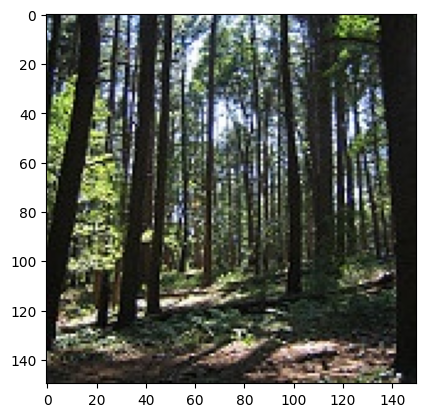

In [58]:
# Full path to the first image
image_path_forest = os.path.join(train_dir, class_folder_forest, images_list_forest[0])

image_forest1 = imread(image_path_forest)
plt.imshow(image_forest1)

In [59]:
image_forest1.shape

(150, 150, 3)

In [60]:
class_folder_sea = 'sea'

images_list_sea = os.listdir(os.path.join(train_dir, class_folder_sea))
print("First image file:", images_list_sea[0])

First image file: 19812.jpg


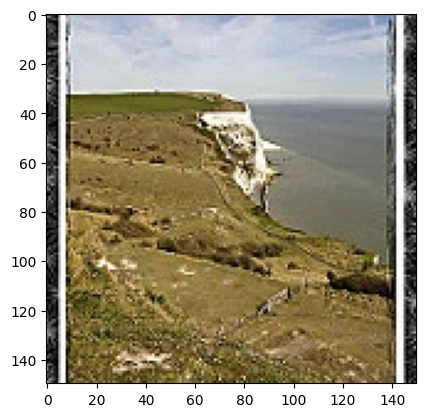

In [61]:
image_path_sea = os.path.join(train_dir, class_folder_sea, images_list_sea[0])

image_sea1 = imread(image_path_sea)
plt.imshow(image_sea1)

In [62]:
image_sea1.shape

(150, 150, 3)

### **Number of Images**

In [63]:
class_folder_mountain = 'mountain'
class_folder_glacier = 'glacier'
class_folder_buildings = 'buildings'
class_folder_street = 'street'

len_forest = len(images_list_forest)
len_sea = len(images_list_sea)
len_street = len(os.listdir(os.path.join(train_dir, class_folder_street)))
len_buildings = len(os.listdir(os.path.join(train_dir, class_folder_buildings)))
len_glacier = len(os.listdir(os.path.join(train_dir, class_folder_glacier)))
len_mountain = len(os.listdir(os.path.join(train_dir, class_folder_mountain)))

In [64]:
print("Glacier: ",len_glacier)
print("Sea: ",len_sea)
print("Mountain: ",len_mountain)
print("buildings: ",len_buildings)
print("Forest: ",len_forest)
print("Street: ",len_street)


Glacier:  2404
Sea:  2274
Mountain:  2512
buildings:  2191
Forest:  2271
Street:  2382


### Analyzing Image Dimensions in the "forest" Folder

In [65]:
dim1 = []
dim2 = []
for image_filename in os.listdir(os.path.join(test_dir, 'forest')):
    img = imread(os.path.join(test_dir, 'forest', image_filename))
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

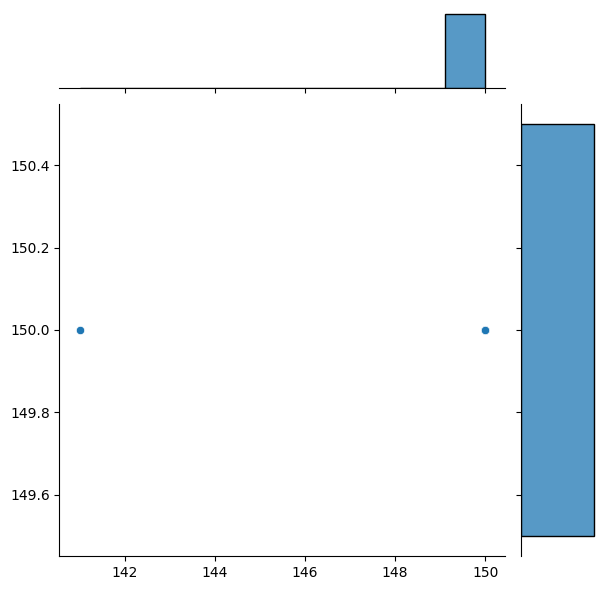

In [66]:
sns.jointplot(x=dim1, y=dim2, kind="scatter")
plt.show()

#### dataset seems to be preprocessed to a fixed size (150×150).

# Preparing the Data for the model
### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us.

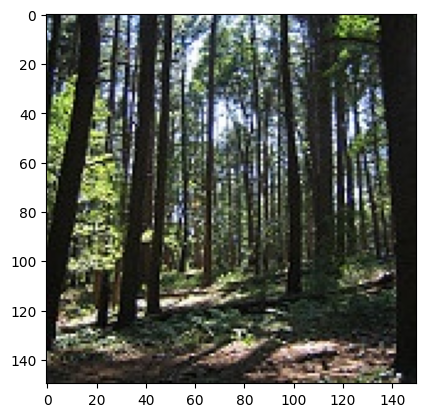

In [67]:
plt.imshow(image_forest1)

In [68]:
image_forest1.max()

255

In [69]:
image_forest1.min()

0

In [70]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

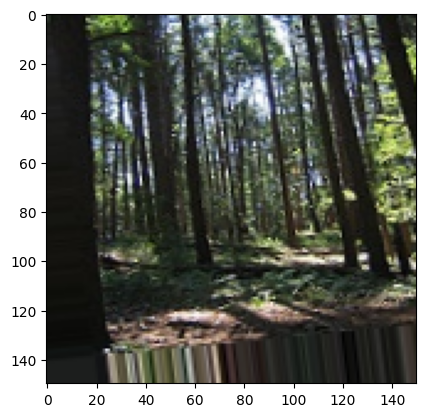

In [71]:
plt.imshow(image_gen.random_transform(image_forest1))

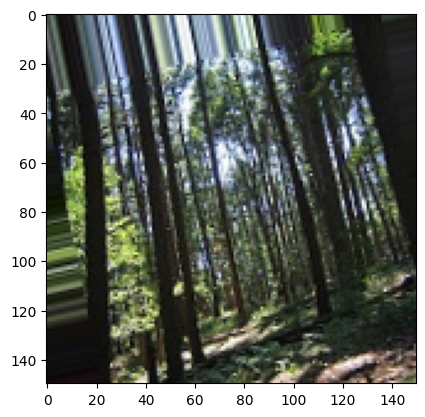

In [72]:
plt.imshow(image_gen.random_transform(image_forest1))

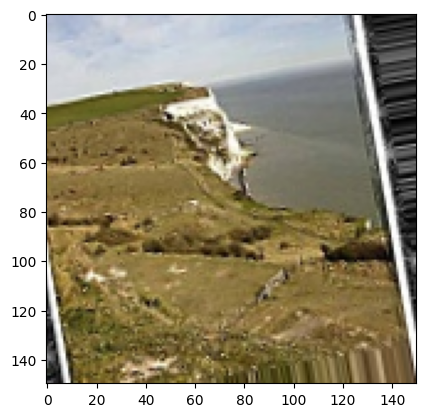

In [73]:
plt.imshow(image_gen.random_transform(image_sea1))

## Generated Manipulated iamge from a directory

In [74]:
image_gen.flow_from_directory(train_dir)

Found 14034 images belonging to 6 classes.


In [75]:
image_gen.flow_from_directory(test_dir)

Found 3000 images belonging to 6 classes.


#### `flow_from_directory`

- Loads images from a directory and creates a **data generator** for training.  
- Automatically labels images based on **folder names**.  
- Can apply **rescaling, augmentation, and batching**.


# Creating the Model

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [77]:
image_shape = (150, 150, 3)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(256)) 
model.add(Activation('relu')) 

model.add(Dropout(0.5)) # Output layer – 6 classes → softmax 
model.add(Dense(6,activation='softmax'))

In [78]:
# Compile
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,564,998 (36.49 MB)

 Trainable params: 9,564,998 (36.49 MB)

 Non-trainable params: 0 (0.00 B)

# Early Stopping

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

#### `val_accuracy` vs `val_loss`

- **`val_accuracy`**  
  - Measures the proportion of correct predictions on the validation set.  
  - Best for **classification tasks** where the goal is to maximize correct predictions.  
  - Stopping on `val_accuracy` prevents overfitting once accuracy plateaus.

- **`val_loss`**  
  - Measures the error (loss) on the validation set.  
  - Useful for **regression tasks** or **imbalanced datasets**.  
  - Can catch subtle improvements even if accuracy doesn’t change.

#### `restore_best_weights=True`

- Restores the model to the **best weights** after EarlyStopping.  
- Prevents keeping weights from later epochs that may have **overfitted**.  

# Training the Model

In [82]:
train_generator = image_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,          
    color_mode='rgb',       # preserve colors
    class_mode="categorical"
)

Found 14034 images belonging to 6 classes.


In [83]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [84]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,             
    color_mode='rgb',           # keep color info
    class_mode="categorical",
    shuffle=False             
)

Found 3000 images belonging to 6 classes.


In [85]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [86]:
results = model.fit(
    train_generator,
    epochs=40,
    validation_data=test_generator,
    callbacks=[early_stop]
)

Epoch 1/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 183ms/step - accuracy: 0.4982 - loss: 1.2692 - val_accuracy: 0.6980 - val_loss: 0.8090
Epoch 2/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 78s 177ms/step - accuracy: 0.6707 - loss: 0.8672 - val_accuracy: 0.7557 - val_loss: 0.6699
Epoch 3/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 78s 177ms/step - accuracy: 0.7220 - loss: 0.7532 - val_accuracy: 0.8020 - val_loss: 0.5400
Epoch 4/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 80s 183ms/step - accuracy: 0.7547 - loss: 0.6745 - val_accuracy: 0.8073 - val_loss: 0.5183
Epoch 5/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 79s 180ms/step - accuracy: 0.7814 - loss: 0.6177 - val_accuracy: 0.8180 - val_loss: 0.5094
Epoch 6/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 79s 179ms/step - accuracy: 0.7879 - loss: 0.6038 - val_accuracy: 0.8117 - val_loss: 0.5261
Epoch 7/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 80s 181ms/step - accuracy: 0.7955 - loss: 0.5748 - val_accuracy: 0.8210 - val_loss: 0.5063
Epoch 8/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 79s 180ms/step - accuracy: 0.8074 - loss: 0

In [88]:
from tensorflow.keras.models import load_model
model.save('/kaggle/working/intel_image_classifier.h5')

# Evaluting the Model

In [89]:
losses = pd.DataFrame(model.history.history)

In [90]:

losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.580234,1.082541,0.698000,0.809001
1,0.691392,0.832291,0.755667,0.669920
2,0.737495,0.719977,0.802000,0.540020
3,0.765854,0.654098,0.807333,0.518303
4,0.779892,0.614729,0.818000,0.509445


<Axes: >

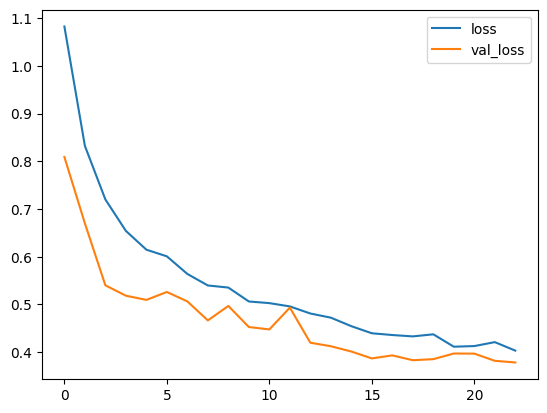

In [91]:
losses[['loss','val_loss']].plot()

In [92]:
model.metrics_names

['loss', 'compile_metrics']

In [93]:
loss, accuracy = model.evaluate(test_generator)
print("Loss:", loss)
print("Accuracy:", accuracy)

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9004 - loss: 0.3294
Loss: 0.3830680251121521
Accuracy: 0.8730000257492065


- **Loss:** 0.3830
- **Accuracy:** 87.30%  

#### Hence,  The model performs well on the test set, showing good generalization for Intel image classification.

In [94]:
# Predict probabilities for all test images
pred_probabilities = model.predict(test_generator) 

# Convert probabilities to predicted class indices (0-5 for 6 classes)
predictions = np.argmax(pred_probabilities, axis=1)

# Get true labels
true_labels = test_generator.classes

# Print first 10 predictions vs true labels
print("Predicted classes:", predictions[:10])
print("True classes:     ", true_labels[:10])

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
Predicted classes: [0 0 0 0 0 5 0 0 0 0]
True classes:      [0 0 0 0 0 0 0 0 0 0]


Shows that the model correctly predicted most images, but misclassified a few.

## `np.argmax` for Predictions

- `np.argmax` returns the **index of the maximum value** along a specified axis.  
- In image classification, the model outputs **probabilities for each class** (softmax output).  
- Using `np.argmax(pred_probabilities, axis=1)` gives the **predicted class** for each image by selecting the class with the **highest probability**.

**Example:**

    probs = np.array([[0.1, 0.7, 0.2],
                      [0.8, 0.1, 0.1]])
                      
    preds = np.argmax(probs, axis=1)
    print(preds)  # Output: [1, 0]

In [95]:
class_counts = pd.Series(test_generator.classes).value_counts()
print(class_counts)

2    553
3    525
4    510
5    501
1    474
0    437
Name: count, dtype: int64


In [96]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n")
print(classification_report(true_labels, predictions, target_names=test_generator.class_indices.keys()))


Classification Report:

              precision    recall  f1-score   support

   buildings       0.84      0.91      0.87       437
      forest       0.95      0.99      0.97       474
     glacier       0.82      0.85      0.84       553
    mountain       0.87      0.76      0.81       525
         sea       0.87      0.89      0.88       510
      street       0.91      0.86      0.88       501

    accuracy                           0.87      3000
   macro avg       0.87      0.88      0.87      3000
weighted avg       0.87      0.87      0.87      3000



💡 The model shows **good precision, recall, and F1-scores** across all classes, with overall accuracy of 86%.

In [97]:
cm = confusion_matrix(true_labels, predictions)
print("\nConfusion Matrix:\n")
print(cm)


Confusion Matrix:

[[398   3   1   1   4  30]
 [  1 467   0   5   1   0]
 [  4   5 472  43  23   6]
 [  5   3  83 397  35   2]
 [ 14   6  20  10 453   7]
 [ 54   9   1   2   3 432]]


#### 💡 Diagonal values show **correct predictions**, off-diagonal values show **misclassifications**.


<Axes: >

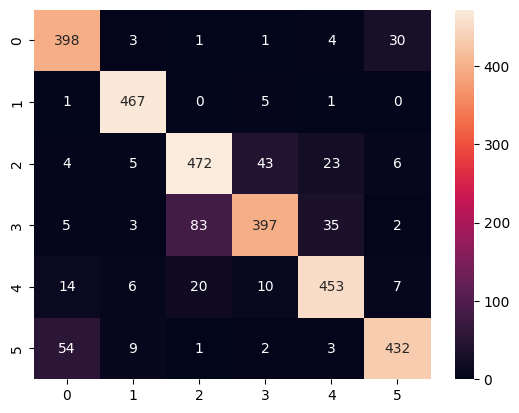

In [98]:
sns.heatmap(cm, annot=True, fmt='d')   # 'd' → integer

# Predicting on an image

In [99]:
from tensorflow.keras.preprocessing import image

In [100]:
import os

pred_dir = '/kaggle/input/intel-image-classification/seg_pred/seg_pred'
images = os.listdir(pred_dir)
len_images = len(os.listdir(pred_dir))
print(len_images)  


7301


In [101]:
# Use the first image from the folder
img_path = os.path.join(pred_dir, images[0])
print("Using image:", img_path)

Using image: /kaggle/input/intel-image-classification/seg_pred/seg_pred/6234.jpg


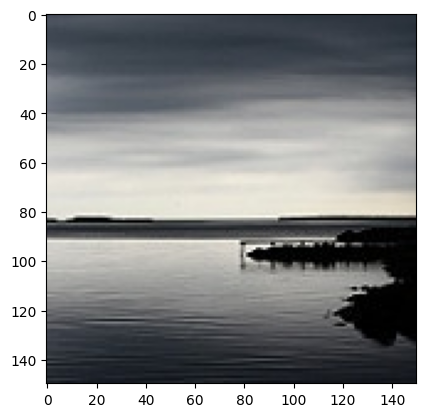

In [102]:
pred_img = imread(img_path)
plt.imshow(pred_img)

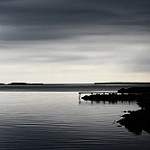

In [103]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Resize image to match model input
img = image.load_img(img_path, target_size=(150, 150))

img

In [104]:
# Convert to array
img_array = image.img_to_array(img)
img_array

array([[[62., 68., 82.],
        [63., 69., 83.],
        [64., 70., 82.],
        ...,
        [42., 49., 59.],
        [40., 49., 58.],
        [40., 49., 58.]],

       [[70., 76., 90.],
        [71., 77., 91.],
        [72., 78., 90.],
        ...,
        [43., 50., 60.],
        [42., 51., 60.],
        [42., 51., 60.]],

       [[75., 81., 93.],
        [76., 82., 94.],
        [77., 83., 95.],
        ...,
        [44., 51., 61.],
        [42., 51., 60.],
        [43., 52., 61.]],

       ...,

       [[25., 30., 36.],
        [25., 30., 36.],
        [25., 30., 36.],
        ...,
        [21., 24., 31.],
        [21., 24., 31.],
        [21., 24., 31.]],

       [[49., 54., 60.],
        [48., 53., 59.],
        [49., 54., 60.],
        ...,
        [18., 21., 26.],
        [18., 21., 26.],
        [18., 21., 26.]],

       [[32., 37., 43.],
        [30., 35., 41.],
        [29., 34., 40.],
        ...,
        [22., 25., 30.],
        [22., 25., 30.],
        [22., 25., 30.]]

In [105]:
# Normalize (rescale 0–255 → 0–1)
img_array = img_array / 255.0

# Add batch dimension → shape becomes (1, 150, 150, 3)
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 150, 150, 3)

In [106]:
# Predict
pred = model.predict(img_array)

# Get class index
pred_class = np.argmax(pred, axis=1)[0]

# Map to class label
class_labels = list(train_generator.class_indices.keys())
print("Predicted class:", class_labels[pred_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
Predicted class: sea


## Prediction Result

The model was tested on an image from the **`seg_pred`** folder.  
It correctly predicted the class as **🌊 sea**.